# Additional Information of Dry Bean Dataset


Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.


Dataset Source: [Dry Bean Dataset](https://archive.ics.uci.edu/dataset/602/dry+bean+dataset) by [UCI Machine Learning Repository](https://archive.ics.uci.edu/), licensed under CC BY 4.0.

# Loading Libraries And Reading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("Dry_Bean_Dataset.csv", encoding="utf-8")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,"610,291","208,178116708527","173,888747041636","1,19719142411602","0,549812187138347",28715,"190,141097274511","0,763922518159806","0,988855998607","0,958027126250128","0,913357754795763","0,00733150613518321","0,00314728916733569","0,834222388245556","0,998723889013168",SEKER
1,28734,"638,018","200,524795663648","182,734419351024","1,09735646068106","0,41178525136724",29172,"191,272750485845","0,783968132707629","0,984985602632661","0,887033636552887","0,953860842260513","0,00697865927694188","0,00356362371210096","0,909850506397935","0,998430331449707",SEKER
2,29380,"624,11","212,826129860206","175,931142612714","1,20971265632436","0,562727316750412",29690,"193,41090409881","0,778113247523704","0,989558773997979","0,947849473016411","0,908774238510331","0,00724391184003426","0,00304773321721317","0,825870616580033","0,999066137363272",SEKER
3,30008,"645,884","210,557998960925","182,516515695305","1,15363805932189","0,498615976402717",30724,"195,467061824781","0,782681272822118","0,976695742741831","0,903936374317338","0,928328834759944","0,00701672883767412","0,00321456207939006","0,861794425446755","0,99419884850682",SEKER
4,30140,"620,134","201,847882166738","190,279278786648","1,06079801990978","0,333679657773177",30417,"195,896502976234","0,77309803519212","0,990893250484926","0,98487706935091","0,970515523241471","0,00669701002543921","0,00366497196445168","0,941900380852666","0,999166058960777",SEKER


# EDA Analysis

##### At this stage, when we look at the data types of features in the dataset, we see that the features, excluding our class label, which should be numerical, are of type 'object'. However, when we read the data, they appeared as numbers separated by commas. Therefore, we will convert the remaining dataset features, excluding the class label, to type 'float'.

In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Area             13611 non-null  int64 
 1   Perimeter        13611 non-null  object
 2   MajorAxisLength  13611 non-null  object
 3   MinorAxisLength  13611 non-null  object
 4   AspectRation     13611 non-null  object
 5   Eccentricity     13611 non-null  object
 6   ConvexArea       13611 non-null  int64 
 7   EquivDiameter    13611 non-null  object
 8   Extent           13611 non-null  object
 9   Solidity         13611 non-null  object
 10  roundness        13611 non-null  object
 11  Compactness      13611 non-null  object
 12  ShapeFactor1     13611 non-null  object
 13  ShapeFactor2     13611 non-null  object
 14  ShapeFactor3     13611 non-null  object
 15  ShapeFactor4     13611 non-null  object
 16  Class            13611 non-null  object
dtypes: int64(2), object(15)
memory 

##### We are checking for missing data in our dataset.

In [4]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

##### We are identifying and removing duplicate data

In [5]:
df[df.duplicated() == True]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5505,33518,"702,956","277,571399152593","154,305580556019","1,79884225931688","0,831240404998129",34023,"206,582775323678","0,808383377951427","0,985157099609088","0,85237690945939","0,744250942115656","0,00828126377327385","0,00156730656581326","0,553909464840041","0,996395753189865",HOROZ
5509,33954,"716,75","277,3684803135","156,356325883681","1,77395112571169","0,825970469020955",34420,"207,922041885746","0,799481987285142","0,986461359674608","0,830549278134394","0,749623899769499","0,00816894858672027","0,00159118114236503","0,561935991105632","0,996846983999753",HOROZ
5548,38427,"756,323","306,533886115713","160,591784403521","1,90877688578066","0,851782423518202",38773,"221,193978185524","0,796976107516177","0,991076264410801","0,844173527888609","0,72159714864942","0,00797704442490209","0,00133413877700051","0,520702444938972","0,993904791268987",HOROZ
5554,38891,"791,343","319,499996298874","156,869618531909","2,03672323097978","0,871168179876645",39651,"222,525412333727","0,650025071034598","0,980832765882323","0,780421893164387","0,696480171866942","0,00821526821883917","0,00119244000548861","0,485084629803805","0,987983134512633",HOROZ
5599,40804,"790,802","323,475648128623","163,287716625049","1,98101642189906","0,863241373842444",41636,"227,932591753294","0,787569967187802","0,980017292727447","0,81993058152539","0,704636015328923","0,00792754749849581","0,00120552983723508","0,496511914098622","0,983598255497906",HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,63408,"1005,966","412,551648919012","196,337704882846","2,10123495721405","0,87949365883356",64200,"284,136539453424","0,798790627362056","0,987663551401869","0,787385320739668","0,688729617728914","0,00650630281540203","0,000903044336280396","0,474348486337016","0,996717621392908",HOROZ
7278,63882,"1004,206","411,263403484974","198,765452787392","2,06908895745016","0,875452318613196",64663,"285,196578865827","0,754704944178628","0,987921995577069","0,796054395462527","0,69346452042443","0,00643786048472143","0,000918371311573614","0,480893041087485","0,995010481028741",HOROZ
7285,63948,"996,497","412,297178100004","198,87755700537","2,07312068947464","0,875970551798773",64641,"285,343866951305","0,777908886320783","0,989279250011603","0,809253971005141","0,692082997672359","0,00644738190561088","0,000912422275089921","0,478978875667158","0,992981016966884",HOROZ
7340,65766,"1035,842","406,416621595223","207,242368635849","1,9610691784234","0,860218320374438",66698,"289,371511899587","0,792294625754454","0,986026567513269","0,770236791747747","0,712007079739447","0,00617973757861545","0,000979686320534704","0,506954081599095","0,994172024299926",HOROZ


In [6]:
df_cleaned = df.drop_duplicates()
df_cleaned.duplicated().sum()

0

##### Now that we have removed duplicate data, we can convert numerical data that should be in float type from object type. An important point to note here is that numbers are formatted with commas instead of periods. In float numbers, the decimal part is separated by a period. Therefore, we will replace commas with periods.

In [7]:
#### Bazı sütunlar sayısal veri olduğu halde object tipinde. Bunları sayısal veri formatı olan float tipine çevireceğiz
def turn_df_numerical(df):
    # Son sütunu hariç tutarak DataFrame oluşturma
    df_without_class = df.drop("Class", axis = 1)
    # Object tipindeki sütunları belirleme
    object_columns = df_without_class.select_dtypes(include=['object']).columns

    # Object tipindeki sütunları float tipine çevirme
    for col in object_columns:
        df_without_class[col] = df_without_class[col].str.replace(',', '.')  # Virgülleri nokta ile değiştir
        df_without_class[col] = pd.to_numeric(df_without_class[col])
    
    return df_without_class

##### We are checking

In [8]:
df_numerical = turn_df_numerical(df_cleaned)
print(df_numerical.dtypes)
df_numerical.head()

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
dtype: object


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [9]:
df_numerical.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

##### We are examining the distribution of the data.

In [10]:
df_numerical.describe().T.sort_values(by = "mean", ascending = False) 

,count,mean,std,min,25%,50%,75%,max
ConvexArea,13543.0,53767.986709,29844.248525,20684.000000,36673.000000,45122.000000,62360.000000,263261.000000
Area,13543.0,53048.460385,29392.438324,20420.000000,36282.500000,44580.000000,61382.000000,254616.000000
Perimeter,13543.0,854.993406,214.722684,524.736000,703.230000,793.896000,977.146500,1985.370000
MajorAxisLength,13543.0,319.895602,85.809260,183.601165,253.086806,296.404589,376.312489,738.860153
EquivDiameter,13543.0,253.034094,59.307709,161.243764,214.933277,238.245711,279.560351,569.374358
MinorAxisLength,13543.0,202.365321,45.051632,122.512653,175.886357,192.491117,217.245403,460.198497
AspectRation,13543.0,1.581075,0.245245,1.024868,1.430662,1.549860,1.703916,2.430306
ShapeFactor4,13543.0,0.995078,0.004347,0.947687,0.993720,0.996393,0.997891,0.999733
Solidity,13543.0,0.987152,0.004650,0.919246,0.985678,0.988288,0.990019,0.994677
roundness,13543.0,0.873671,0.059393,0.489618,0.833410,0.883490,0.917031,0.990685


In [11]:
def data_distribution_function(df):
    
   
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))
    axes = axes.flatten()
    
   
    for i, column in enumerate(df.columns):
        sns.histplot(df[column], kde=True, ax=axes[i], color='skyblue', edgecolor='black')
        
        
        mean_value = df[column].mean()
        axes[i].axvline(mean_value, color='#F72AC6', linestyle='--', linewidth=2, label='Mean')
    
        
        median_value = df[column].median()
        axes[i].axvline(median_value, color='#FADD4B', linestyle='--', linewidth=2, label='Median')
    
      
        mode_value = df[column].mode()[0]
        axes[i].axvline(mode_value, color='#787150', linestyle='--', linewidth=3, label='Mode')
        
        
        skew_value = df[column].skew()
        
    
        axes[i].text(0.95, 0.01, f'Skew: {skew_value:.2f}', 
                     verticalalignment='bottom', horizontalalignment='right', 
                     transform=axes[i].transAxes, 
                     color='black', fontsize=12)
        
        
        axes[i].set_title(column)
    
       
        axes[i].legend()
    
  
    plt.tight_layout()
    plt.show()
    

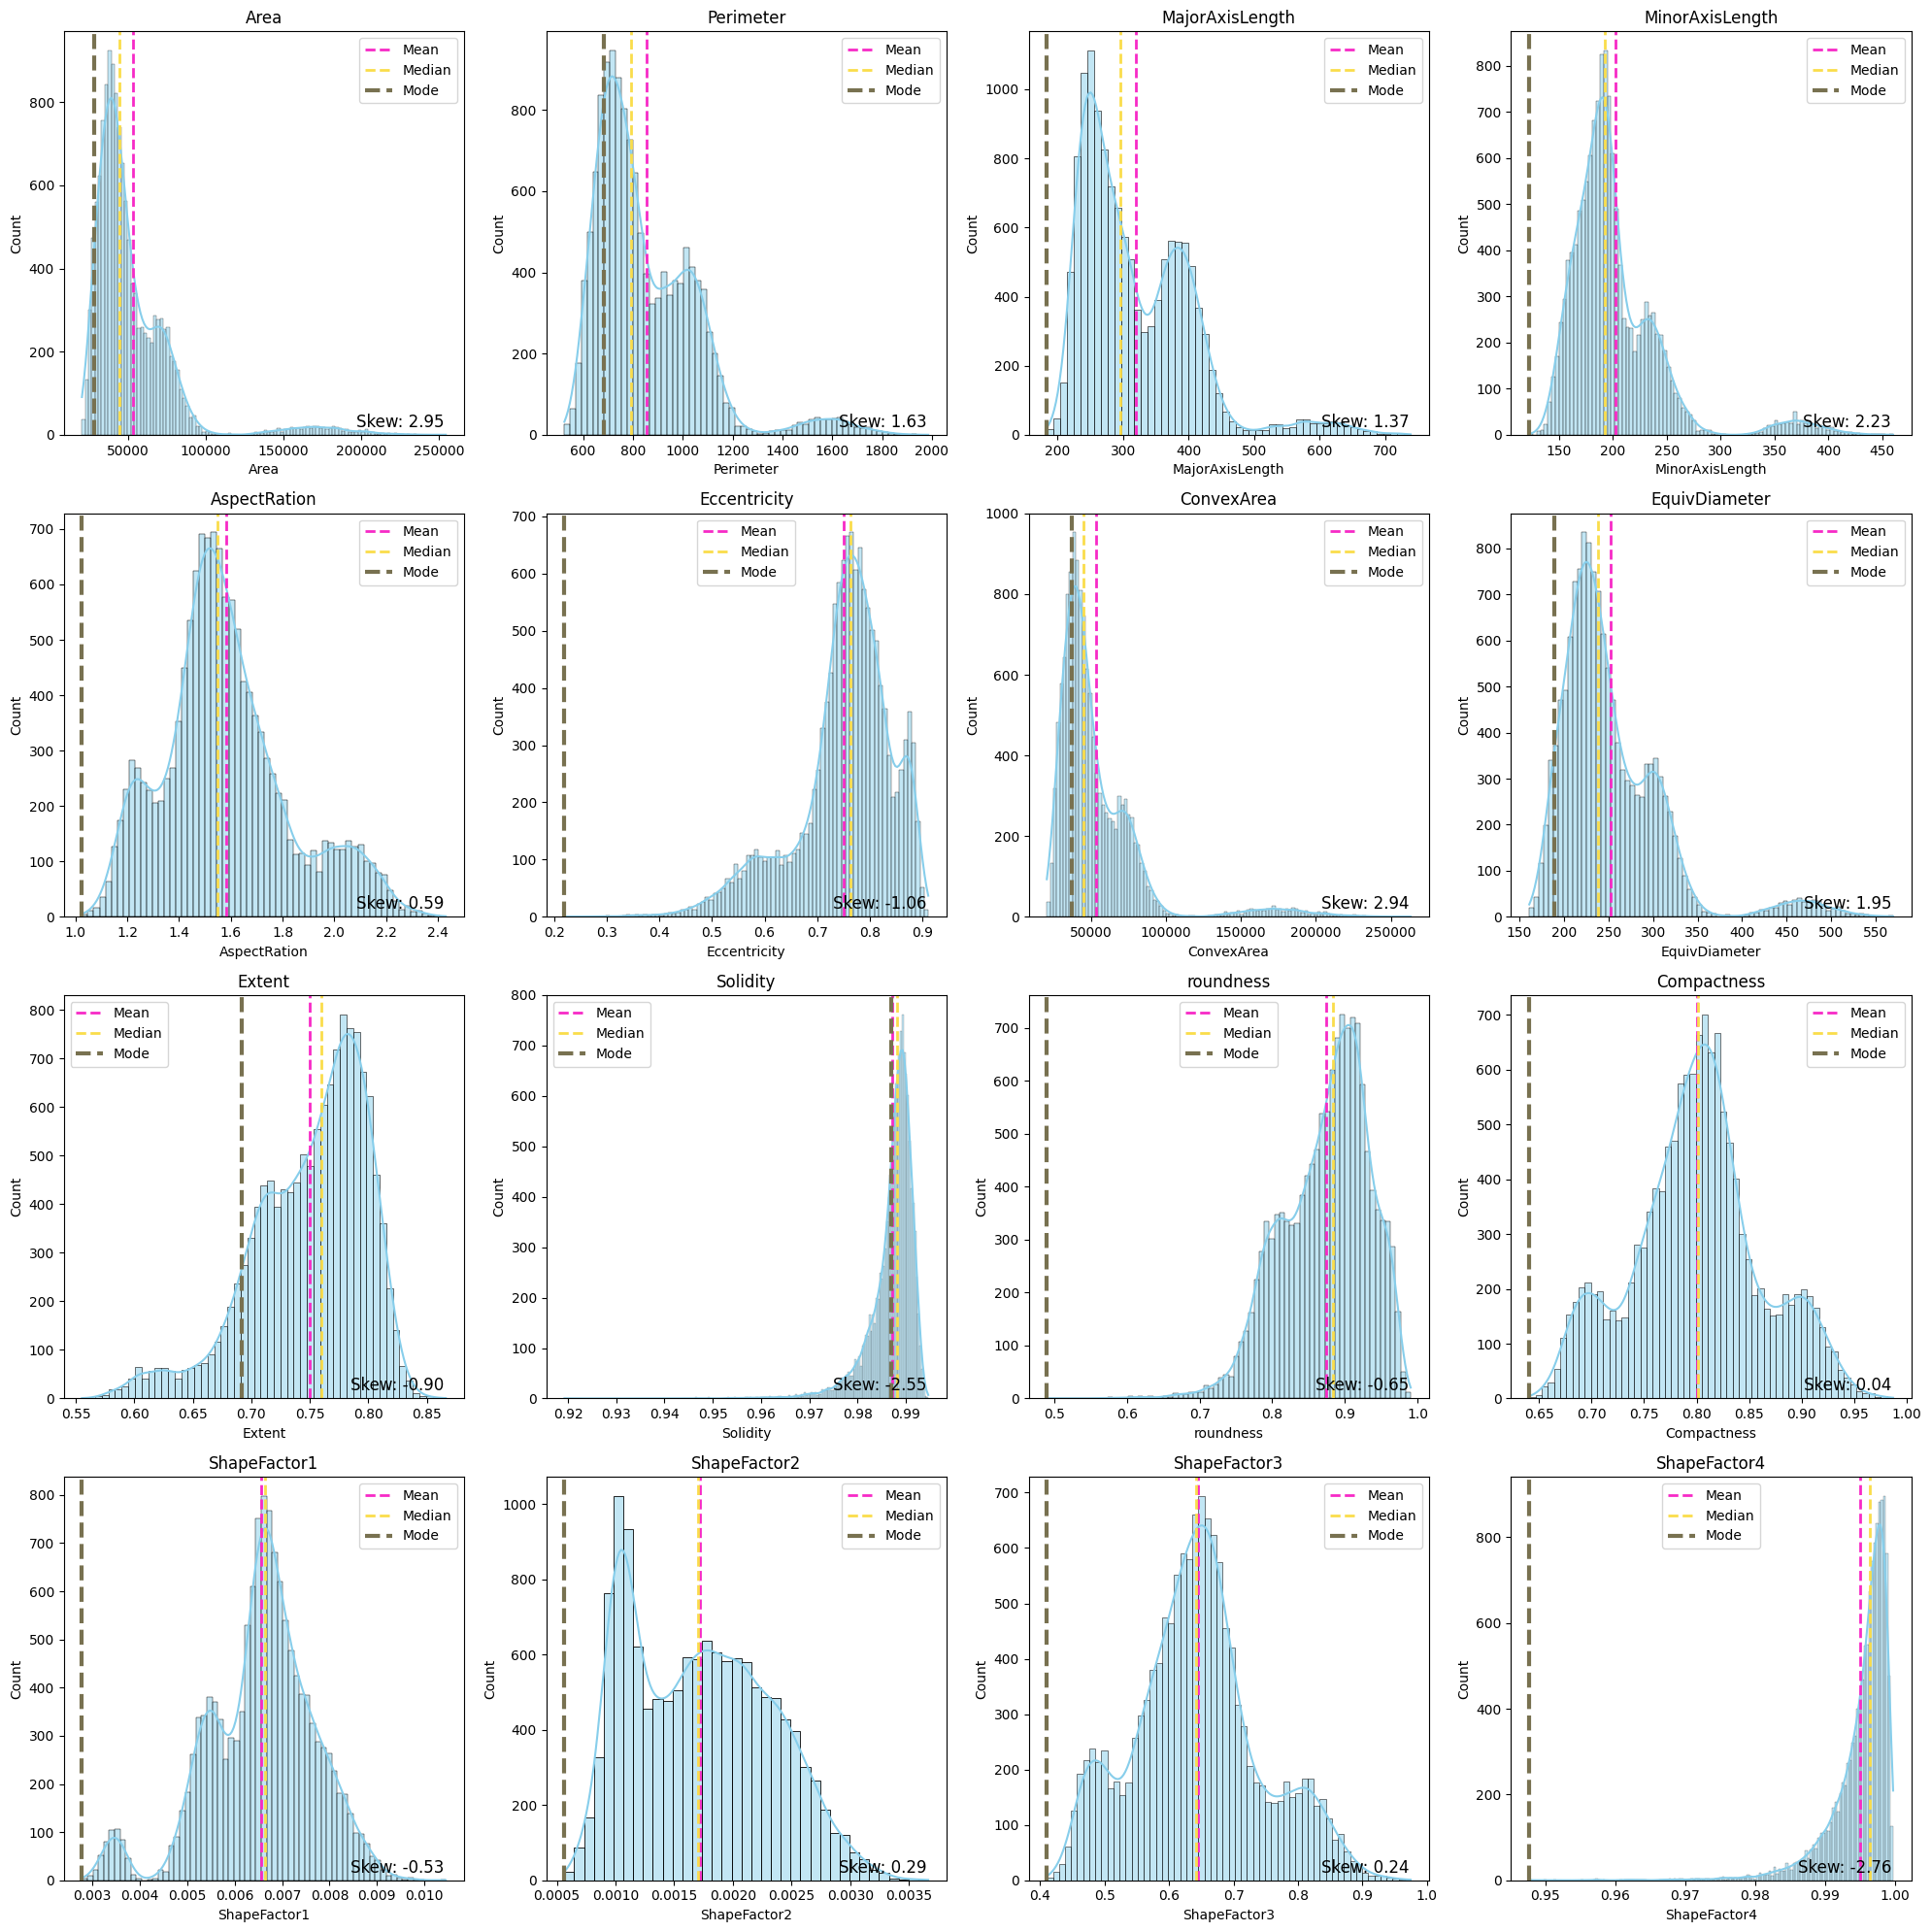

In [12]:
data_distribution_function(df_numerical)

Based on the results obtained here, we find that the skewness values we use to check the symmetry of the data are mostly outside the acceptable range of -0.5 to 0.5 for almost all attributes. This indicates that we need to normalize, transform, and standardize the data distribution to achieve symmetry. Many artificial intelligence classification and clustering algorithms such as KNN, K-Means, Logistic Regression, Linear Regression, Artificial Neural Networks, SVM are affected by data skewness. Data closer to a normal (Gaussian) distribution ensures these algorithms operate more effectively and accurately. Additionally, symmetric data distribution is crucial in techniques like Principal Component Analysis.



In [13]:
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler, StandardScaler

##### Box-Cox analysis is a statistical method used to transform non-normal data into a normal distribution. It achieves this by applying a power transformation to the data, which is determined using maximum likelihood estimation. This technique is valuable in preparing data for statistical modeling and analysis, ensuring assumptions of normality are met for reliable results.

In [14]:
fitted_lambda = []
df_fitted = pd.DataFrame()

for i, column in enumerate(df_numerical.columns): 
    df_fitted[column], lamb = boxcox(df_numerical[column])
    fitted_lambda.append(lamb)

In [15]:
df_fitted.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,1.226455,0.707419,0.884778,0.543018,0.173390,-0.241596,1.224529,0.613253,-0.131748,-0.006017,-0.039040,-0.087410,-0.541097,-2.473073,-0.174820,-0.001145
1,1.226458,0.707424,0.884685,0.543022,0.091127,-0.261267,1.224533,0.613254,-0.126369,-0.006776,-0.092920,-0.046353,-0.541103,-2.456241,-0.092706,-0.001375
2,1.226463,0.707421,0.884831,0.543019,0.183021,-0.238916,1.224537,0.613256,-0.128015,-0.005834,-0.047660,-0.092078,-0.541099,-2.477309,-0.184157,-0.000862
3,1.226468,0.707425,0.884805,0.543021,0.138745,-0.250672,1.224544,0.613258,-0.126736,-0.007556,-0.081365,-0.072193,-0.541102,-2.470259,-0.144386,-0.003662
4,1.226469,0.707421,0.884701,0.543024,0.058301,-0.266851,1.224542,0.613259,-0.129375,-0.005441,-0.014734,-0.029571,-0.541107,-2.452339,-0.059143,-0.000777


##### Standardization is the process of transforming each feature in a dataset to have a mean of zero and a standard deviation of one. This transformation is applied when features in the dataset have different scales. Particularly in multivariate analysis and machine learning algorithms, standardizing the dataset helps algorithms perform better and guards against biases.

In [16]:
scaler_standard = StandardScaler()
df_standard = scaler_standard.fit_transform(df_fitted)
df_standard = pd.DataFrame(df_standard, columns = df_fitted.columns)

In [17]:
df_standard.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-1.567780,-1.685877,-1.997002,-0.686305,-1.823011,-1.855924,-1.569413,-1.567780,0.158091,0.247777,1.633688,1.821174,0.665091,2.026381,1.821175,1.285548
1,-1.519853,-1.369529,-2.251778,-0.336110,-2.475280,-2.371417,-1.505811,-1.519853,0.682043,-0.818501,0.122886,2.460183,0.316935,2.472027,2.460183,1.110899
2,-1.431308,-1.523971,-1.851769,-0.600989,-1.746644,-1.785693,-1.435873,-1.431308,0.521752,0.503579,1.391981,1.748513,0.577304,1.914207,1.748513,1.500679
3,-1.348553,-1.285723,-1.921788,-0.344161,-2.097717,-2.093762,-1.302690,-1.348553,0.646282,-1.915000,0.446900,2.058009,0.353797,2.100881,2.058009,-0.628702
4,-1.331557,-1.569663,-2.206263,-0.073315,-2.735563,-2.517753,-1.341374,-1.331557,0.389288,1.056166,2.315216,2.721378,0.049512,2.575334,2.721378,1.565926


##### Min-Max scaling (ranging from 0.01 to 1.01) - Used to normalize data to a positive range

In [18]:
scaler_minmax = MinMaxScaler(feature_range=(0.01, 1.01))
df_scaled = scaler_minmax.fit_transform(df_standard)
df_scaled = pd.DataFrame(df_scaled, columns = df_standard.columns)

In [19]:
df_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.280222,0.236818,0.176771,0.530797,0.217541,0.161103,0.278640,0.280222,0.434997,0.488758,0.865225,0.803517,0.483900,0.901925,0.803517,0.849183
1,0.288659,0.294830,0.129495,0.581005,0.102921,0.058676,0.289843,0.288659,0.520253,0.302675,0.604102,0.917009,0.434374,0.989662,0.917009,0.807409
2,0.304248,0.266509,0.203720,0.543029,0.230961,0.175058,0.302162,0.304248,0.494171,0.533399,0.823449,0.790611,0.471412,0.879841,0.790611,0.900640
3,0.318817,0.310199,0.190727,0.579851,0.169268,0.113845,0.325621,0.318817,0.514434,0.111318,0.660104,0.845580,0.439618,0.916592,0.845580,0.391316
4,0.321809,0.258130,0.137941,0.618682,0.057183,0.029599,0.318807,0.321809,0.472617,0.629835,0.983018,0.963399,0.396333,1.010000,0.963399,0.916246


##### Verification of transformation processes

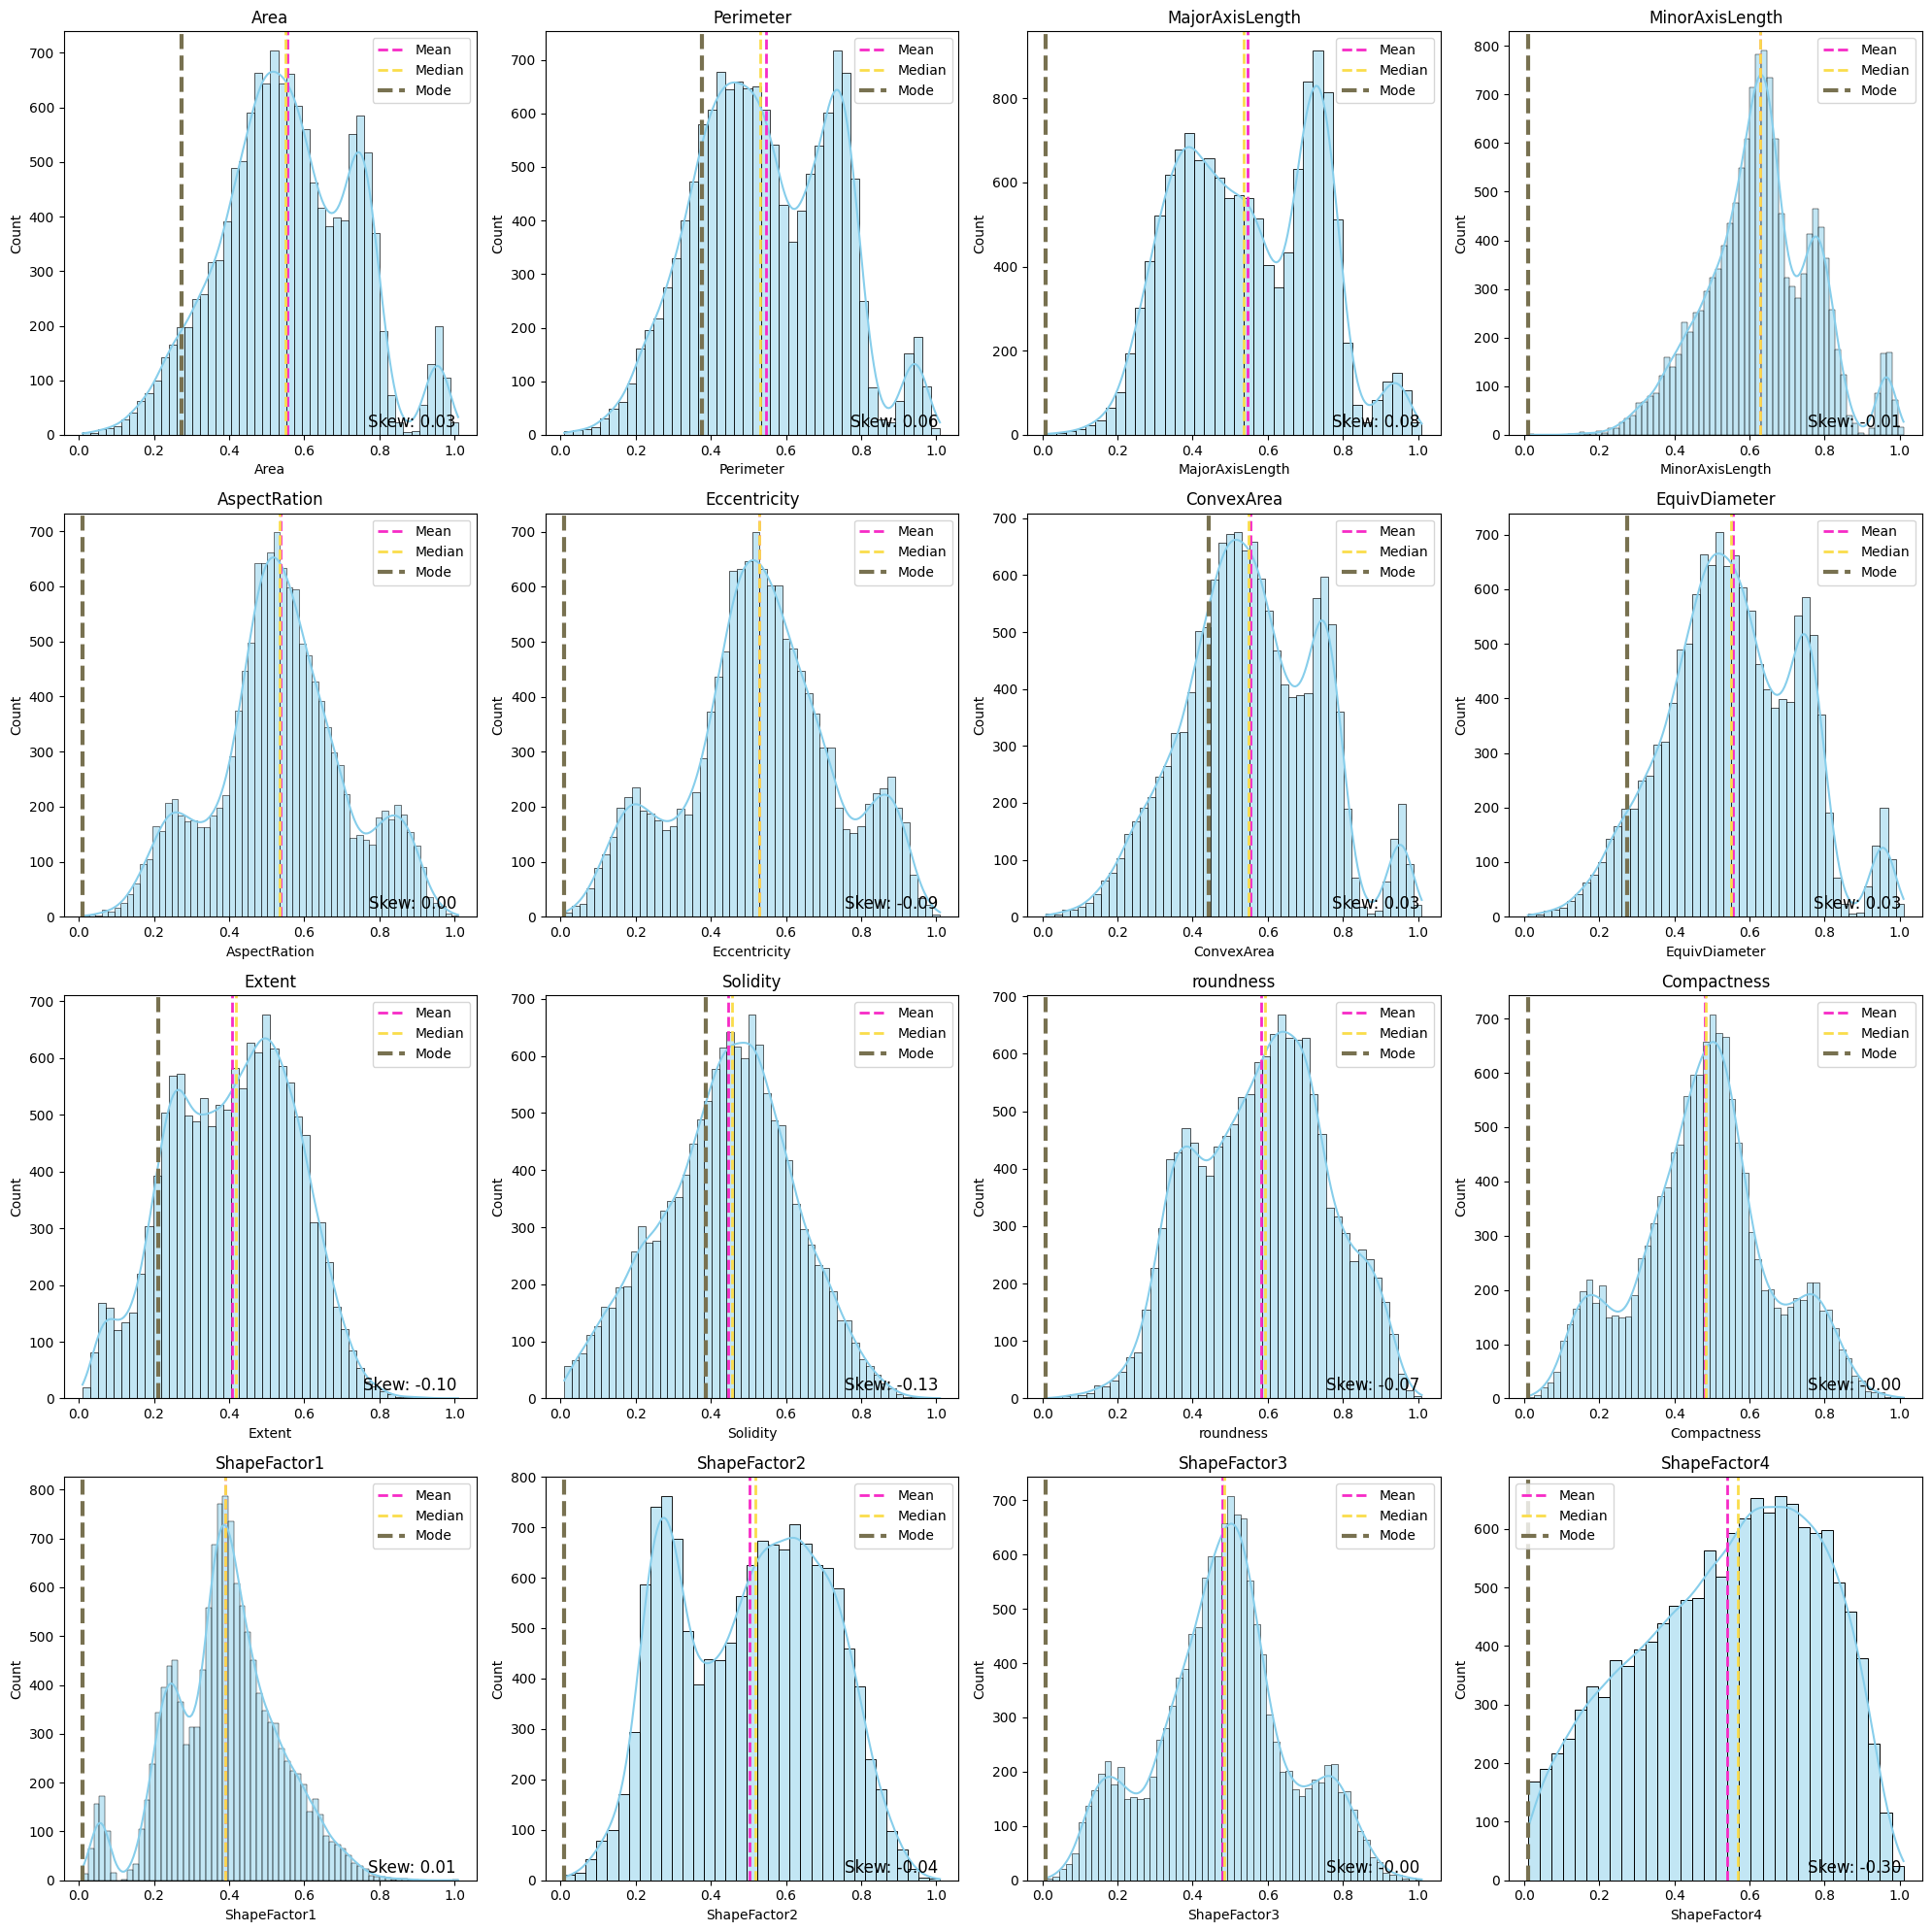

In [20]:
data_distribution_function(df_scaled)

##### We are converting class labels into numerical data and examining their relationships with other attributes through a correlation matrix.

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_scaled['NumericalClass'] = label_encoder.fit_transform(df_cleaned['Class'])
df_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,NumericalClass
0,0.280222,0.236818,0.176771,0.530797,0.217541,0.161103,0.278640,0.280222,0.434997,0.488758,0.865225,0.803517,0.483900,0.901925,0.803517,0.849183,5
1,0.288659,0.294830,0.129495,0.581005,0.102921,0.058676,0.289843,0.288659,0.520253,0.302675,0.604102,0.917009,0.434374,0.989662,0.917009,0.807409,5
2,0.304248,0.266509,0.203720,0.543029,0.230961,0.175058,0.302162,0.304248,0.494171,0.533399,0.823449,0.790611,0.471412,0.879841,0.790611,0.900640,5
3,0.318817,0.310199,0.190727,0.579851,0.169268,0.113845,0.325621,0.318817,0.514434,0.111318,0.660104,0.845580,0.439618,0.916592,0.845580,0.391316,5
4,0.321809,0.258130,0.137941,0.618682,0.057183,0.029599,0.318807,0.321809,0.472617,0.629835,0.983018,0.963399,0.396333,1.010000,0.963399,0.916246,5


In [22]:
print("Scaled And Transformed Dataframe",df_scaled["NumericalClass"].value_counts())
print("Only Duplicated Removed Dataframe",df_cleaned["Class"].value_counts())

Scaled And Transformed Dataframe NumericalClass
3    3546
6    2636
5    2027
4    1860
2    1630
0    1322
1     522
Name: count, dtype: int64
Only Duplicated Removed Dataframe Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


We noticed that the distribution of class labels is uneven

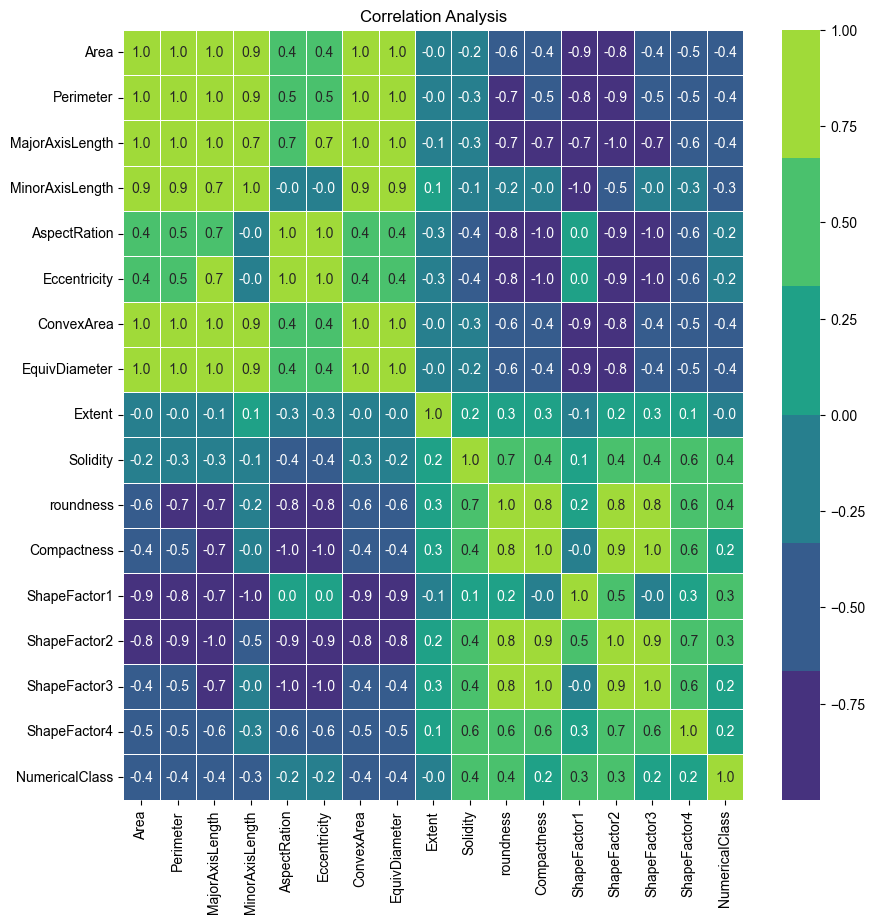

In [23]:
# creation of correlation heatmap

df_corr = df_scaled.corr()

plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize = (10,10))
ax = sns.heatmap(df_corr, annot = True, fmt = ".1f" ,cmap = sns.color_palette("viridis"), linewidths =.4, linecolor = "w")
plt.title("Correlation Analysis")
plt.show()

##### We noticed the unequal distribution of class labels, so we are using RandomOverSampler to balance the numbers

In [24]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled.iloc[:, :-1], df_scaled["NumericalClass"], test_size=0.2, random_state=42)

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [25]:
y_train_resampled.value_counts()

NumericalClass
4    2839
3    2839
5    2839
0    2839
2    2839
6    2839
1    2839
Name: count, dtype: int64

# Classification

##### GridSearchCV:
**GridSearchCV** is a hyperparameter tuning technique widely used in machine learning. It systematically searches through a predefined hyperparameter space to find the optimal set of hyperparameters for a given model. This exhaustive search is performed using cross-validation to evaluate model performance across different parameter combinations. GridSearchCV helps in automating the process of hyperparameter tuning, ensuring that the model achieves the best performance without manual trial and error. By selecting the optimal hyperparameters, GridSearchCV enhances the generalization and predictive capabilities of machine learning models, making them more robust and effective.

In [26]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

##### k-Nearest Neighbors (KNN):
**KNN** is a simple and versatile machine learning algorithm used for both classification and regression tasks. The algorithm classifies a data point based on the majority class of its k nearest neighbors in the feature space. In the context of classification, the output is a class label, while for regression, it predicts a continuous value. KNN relies on the assumption that similar instances in the feature space tend to belong to the same class or have similar output values. It is a non-parametric, lazy-learning algorithm, meaning it doesn't make assumptions about the underlying data distribution during training. KNN is easy to implement and understand, making it a popular choice for various applications

In [27]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()


param_grid_knn = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}


grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_resampled, y_train_resampled)


print("KNN - Best score parameters:", grid_search_knn.best_params_)
print("KNN - Best Score:", grid_search_knn.best_score_)


y_pred_knn = grid_search_knn.predict(X_test)
print("KNN - Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN - Best score parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
KNN - Best Score: 0.968853383470546
KNN - Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       259
           1       1.00      1.00      1.00       114
           2       0.89      0.95      0.92       305
           3       0.93      0.89      0.91       707
           4       0.97      0.94      0.96       376
           5       0.94      0.95      0.95       414
           6       0.85      0.90      0.87       534

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



##### Support Vector Machine (SVM):
**Support Vector Machine** is a powerful machine learning algorithm used for classification and regression tasks. It excels in finding a hyperplane that best separates different classes in the feature space. SVM aims to maximize the margin between classes, making it robust to outliers. It is effective in high-dimensional spaces and can capture complex relationships through various kernel functions. SVM is widely employed for tasks like image classification, handwriting recognition, and bioinformatics. Its versatility and ability to handle non-linear data make it a popular choice in diverse applications.

In [28]:
from sklearn.svm import SVC

svm = SVC()

param_grid_svm = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': ['scale', 'auto']}

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_resampled, y_train_resampled)

print("SVM - Best Score Parameters:", grid_search_svm.best_params_)
print("SVM - Best Score:", grid_search_svm.best_score_)

y_pred_svm = grid_search_svm.predict(X_test)
print("SVM - Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM - Best Score Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
SVM - Best Score: 0.949529767387389
SVM - Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       259
           1       1.00      1.00      1.00       114
           2       0.92      0.96      0.94       305
           3       0.93      0.89      0.91       707
           4       0.97      0.94      0.95       376
           5       0.93      0.95      0.94       414
           6       0.86      0.89      0.88       534

    accuracy                           0.92      2709
   macro avg       0.93      0.94      0.94      2709
weighted avg       0.92      0.92      0.92      2709



#### Naive Bayes:
**Naive Bayes** is a probabilistic machine learning algorithm based on Bayes' theorem. It is particularly popular for classification tasks. The 'naive' assumption of independence among features simplifies computation and training. Despite its simplicity, Naive Bayes often performs well, especially in text classification and spam filtering. The algorithm calculates the probability of each class given a set of features and predicts the class with the highest probability. Naive Bayes is known for its efficiency, scalability, and ease of implementation.

In [29]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

naive_bayes.fit(X_train_resampled, y_train_resampled)


y_pred_nb = naive_bayes.predict(X_test)
print("Naive Bayes - Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes - Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82       259
           1       1.00      1.00      1.00       114
           2       0.86      0.91      0.88       305
           3       0.93      0.83      0.88       707
           4       0.96      0.95      0.95       376
           5       0.92      0.95      0.94       414
           6       0.79      0.89      0.83       534

    accuracy                           0.89      2709
   macro avg       0.90      0.90      0.90      2709
weighted avg       0.89      0.89      0.89      2709



##### Conclusion
As a result, the SVM algorithm wins the best result with very small nuances. However, I would prefer the KNN algorithm due to speed.
